In [1]:
# pip install konlpy

     |████████████████████████████████| 19.4 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 457 kB 11.8 MB/s eta 0:00:01
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.26.5-py2.py3-none-any.whl (138 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
     |████████████████████████████████| 145 kB 11.8 MB/s eta 0:00:01
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
You should consider upgrading via the '/home/sslab/.jupyter/ej/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# !pip install soyspacing

In [5]:
# pip install soynlp

     |████████████████████████████████| 416 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 27.2 MB 5.6 MB/s eta 0:00:011
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
You should consider upgrading via the '/home/sslab/.jupyter/ej/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# !pip install graphviz

In [7]:
# !pip install fsspec

In [8]:
# pip install --user JPype1-1.2.0-cp38-cp38-win_amd64.whl

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the '/home/sslab/.jupyter/ej/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
# pip install --upgrade pip

  Using cached pip-21.1.2-py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3
Note: you may need to restart the kernel to use updated packages.


In [18]:
# pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from konlpy.tag import Hannanum
from konlpy.tag import Komoran
from hanspell import spell_checker
import re
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Kkma
from sklearn.linear_model import Lasso
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns
import tensorflow as tf
import os
import graphviz
from tqdm.notebook import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from soynlp.normalizer import *
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2

In [8]:
df = pd.read_csv('./2021-03-26_20-11-16 웨이브.csv')
df.head()

,name,ratings,date,helpful,comment,developer_comment
0,서울사람,1,2021-03-26,0,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,"wavve2021년 3월 26일안녕하세요, 웨이브입니다. 이용에 불편을 드려 죄송합..."
1,황효원,1,2021-03-26,0,한번더팅기면 회사 소각시켜도되나요?,"wavve2021년 3월 26일안녕하세요, 웨이브입니다. 이용에 불편을 드려 죄송합..."
2,삥뽕,1,2021-03-25,0,프리미엄13900원짜리 후기입니다. 일단 사지 마세요. 재미있는 영화는 거의다 막아...,"wavve2021년 3월 26일안녕하세요, 웨이브입니다. 이용에 불편을 드려 죄송합..."
3,김은경,3,2021-03-25,0,오늘 앱이 죙일 안열리네요?자주 이러면 곤란한데 먼일이데요 ?? 언넝 조치를 취해주...,"wavve2021년 3월 26일안녕하세요, 웨이브입니다. 이용에 불편을 드려 죄송합..."
4,윤석원,5,2021-03-25,0,ㅡㄴㄴㄱㆍ 즈 ᆢㄱㄴ 그냥 ㄴㄴㆍㄴㆍ드ㅡㅡㅜ ㅣ두 ㆍ ㆍㄴ노트 ㄴㆍ ㆍ ㅡㅡ ㅡㅡ윤...,wavve2021년 3월 25일안녕하세요. wavve(웨이브)입니다. 소중한 리뷰 ...


In [9]:
df.describe() # data 살펴보기

,ratings,helpful
count,30400.000000,30400.000000
mean,2.157336,1.716974
std,1.582376,12.171663
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,3.000000,1.000000
max,5.000000,1026.000000


In [10]:
df = df[['date', 'comment', 'ratings']] # 날짜, 리뷰내용, 평점

In [11]:
df = df.dropna(axis = 0, how = 'any') # 모든 행에서 NaN 값이 하나라도 있으면 삭제(결측치 제거)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30400 entries, 0 to 30399
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     30400 non-null  object
 1   comment  30400 non-null  object
 2   ratings  30400 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 950.0+ KB


In [12]:
df['comment'] # comment 확인

0        오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...
1                                      한번더팅기면 회사 소각시켜도되나요?
2        프리미엄13900원짜리 후기입니다. 일단 사지 마세요. 재미있는 영화는 거의다 막아...
3        오늘 앱이 죙일 안열리네요?자주 이러면 곤란한데 먼일이데요 ?? 언넝 조치를 취해주...
4        ㅡㄴㄴㄱㆍ 즈 ᆢㄱㄴ 그냥 ㄴㄴㆍㄴㆍ드ㅡㅡㅜ ㅣ두 ㆍ ㆍㄴ노트 ㄴㆍ ㆍ ㅡㅡ ㅡㅡ윤...
                               ...                        
30395    암튼, 실시간 볼때도 계속 끊기거나 꺼지고.. 이걸 돈내고 써야하나 심각히 고민중입니다.
30396    이거 시간 돌리기 쓰면 화질엄청 깨지고 랙먹고;;;;;;차라리 전에것이 더 좋았어요...
30397    렉때문에 못참겠어요..... 다른서비스다좋고 티비광고하고 이벤트 좋은면 뭐해요 기존...
30398    실시간티비이건 다시보기이건 왜이렇게 렉걸리고 똑같은 와이파이 사용하는데 비디오포털 ...
30399    맛보기할땐 랙도안걸리고 버퍼링같은건 없었는데 유료결제하고나선 버퍼링이 심하게 생기는...
Name: comment, Length: 30400, dtype: object

In [13]:
from soyspacing.countbase import CountSpace
def 띄어쓰기(text):
    verbose=False
    mc = 10  # min_count
    ft = 0.3 # force_abs_threshold
    nt =-0.3 # nonspace_threshold
    st = 0.3 # space_threshold


    sent_corrected, tags = model.correct(
    doc=text,
    verbose=verbose,
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc)
    sent_corrected, tags = model.correct(text)
    result = sent_corrected
    return result
corpus_fname = '99714_norm.txt' # 첨부파일을 경로에 저장
model = CountSpace()
model.train(corpus_fname)    

df['comment'] = df['comment'].apply(lambda x: 띄어쓰기(x))
df.head()

all tags length = 477994 --> 46185, (num_doc = 13813)

,date,comment,ratings
0,2021-03-26,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,1
1,2021-03-26,한번 더팅기면 회사 소각시켜도되나요?,1
2,2021-03-25,프리미엄13900원짜리 후기입니다. 일단 사지 마세요. 재미있는 영화는 거의다 막아...,1
3,2021-03-25,오늘 앱이 죙일 안열리네요?자주 이러면 곤란한데 먼일이데요 ?? 언넝 조치를 취해주...,3
4,2021-03-25,ㅡㄴㄴㄱㆍ 즈 ᆢㄱㄴ 그냥 ㄴㄴㆍㄴㆍ드ㅡㅡㅜ ㅣ두 ㆍ ㆍㄴ노트 ㄴㆍ ㆍ ㅡㅡ ㅡㅡ윤...,5


In [14]:
#맞춤법 검사기
for i in tqdm(range(len(df))): 
    try: 
        result = spell_checker.check(df['comment'][i])
        a= result[1]
        df['comment'][i] = a
    except: 
        pass

  0%|          | 0/30400 [00:00<?, ?it/s]

<ipython-input-14-758cfaf193a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment'][i] = a


In [15]:
def text_cleaning(text):
    result = only_hangle(text)
    result = repeat_normalize(result, num_repeats=3) #반복적인 단어 응축(3번 이상인것들)
    result = emoticon_normalize(result,num_repeats=3) #반복적인 자음,모음 응축(3번 이상인것들)
    return result
df['ko_text'] = df['comment'].apply(lambda x: text_cleaning(x))
df.head()

,date,comment,ratings,ko_text
0,2021-03-26,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,1,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...
1,2021-03-26,한번 더팅기면 회사 소각시켜도되나요?,1,한번 더팅기면 회사 소각시켜도되나요
2,2021-03-25,프리미엄13900원짜리 후기입니다. 일단 사지 마세요. 재미있는 영화는 거의다 막아...,1,프리미엄 원짜리 후기입니다 일단 사지 마세요 재미있는 영화는 거의다 막아서 프리미엄...
3,2021-03-25,오늘 앱이 죙일 안열리네요?자주 이러면 곤란한데 먼일이데요 ?? 언넝 조치를 취해주...,3,오늘 앱이 죙일 안열리네요 자주 이러면 곤란한데 먼일이데요 언넝 조치를 취해주셔요 ...
4,2021-03-25,ㅡㄴㄴㄱㆍ 즈 ᆢㄱㄴ 그냥 ㄴㄴㆍㄴㆍ드ㅡㅡㅜ ㅣ두 ㆍ ㆍㄴ노트 ㄴㆍ ㆍ ㅡㅡ ㅡㅡ윤...,5,ㅡㄴㄴㄱ 즈 ㄱㄴ 그냥 ㄴㄴ ㄴ 드ㅡㅡㅜ ㅣ두 ㄴㄴㅗ트 ㄴ ㅡㅡ ㅡㅡ윤석원드ㅡ ㄴ ...


In [16]:
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus
from soynlp.tokenizer import LTokenizer
word_extractor = WordExtractor(min_frequency=100,
   min_cohesion_forward=0.05,
   min_right_branching_entropy=0.0
)
word_extractor.train(df['ko_text'].values)
words = word_extractor.extract()
words

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)


training was done. used memory 0.712 Gbory 0.700 Gb
all cohesion probabilities was computed. # words = 1742
all branching entropies was computed # words = 33544
all accessor variety was computed # words = 33544


In [17]:
df['nouns'] = df['ko_text'].apply(lambda x: tokenizer.tokenize(x, remove_r=True)) # L과 R 분리하여 R은 삭제
df

,date,comment,ratings,ko_text,nouns
0,2021-03-26,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,1,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,"[오류, 굉장히, 많고, 개별구, 영화, 개많아요, 가뜩이나, 비싼, 돈을, 얼마,..."
1,2021-03-26,한번 더팅기면 회사 소각시켜도되나요?,1,한번 더팅기면 회사 소각시켜도되나요,"[한번, 더팅기면, 회사, 소각시켜도되나요]"
2,2021-03-25,프리미엄13900원짜리 후기입니다. 일단 사지 마세요. 재미있는 영화는 거의다 막아...,1,프리미엄 원짜리 후기입니다 일단 사지 마세요 재미있는 영화는 거의다 막아서 프리미엄...,"[프리, 원짜리, 후기입니다, 일단, 사지, 마세요, 재미있, 영화, 거의, 막아서..."
3,2021-03-25,오늘 앱이 죙일 안열리네요?자주 이러면 곤란한데 먼일이데요 ?? 언넝 조치를 취해주...,3,오늘 앱이 죙일 안열리네요 자주 이러면 곤란한데 먼일이데요 언넝 조치를 취해주셔요 ...,"[오늘, 앱이, 죙일, 안열리네요, 자주, 이러면, 곤란한데, 먼일이데요, 언넝, ..."
4,2021-03-25,ㅡㄴㄴㄱㆍ 즈 ᆢㄱㄴ 그냥 ㄴㄴㆍㄴㆍ드ㅡㅡㅜ ㅣ두 ㆍ ㆍㄴ노트 ㄴㆍ ㆍ ㅡㅡ ㅡㅡ윤...,5,ㅡㄴㄴㄱ 즈 ㄱㄴ 그냥 ㄴㄴ ㄴ 드ㅡㅡㅜ ㅣ두 ㄴㄴㅗ트 ㄴ ㅡㅡ ㅡㅡ윤석원드ㅡ ㄴ ...,"[ㅡㄴㄴㄱ, 즈, ㄱㄴ, 그냥, ㄴㄴ, ㄴ, 드ㅡㅡㅜ, ㅣ두, ㄴㄴㅗ트, ㄴ, ㅡㅡ..."
...,...,...,...,...,...
30395,2015-11-22,"암튼, 실시간 볼때도 계속 끊기거나 꺼지고.. 이걸 돈내고 써야하나 심각히 고민중입니다.",2,암튼 실시간 볼때도 계속 끊기거나 꺼지고 이걸 돈내고 써야하나 심각히 고민중입니다,"[암튼, 실시간, 볼때, 계속, 끊기, 꺼지, 이걸, 돈내고, 써야하나, 심각히, 고민]"
30396,2015-11-22,이거 시간 돌리기 쓰면 화질엄청 깨지고 랙먹고;;;;;;차라리 전에것이 더 좋았어요...,1,이거 시간 돌리기 쓰면 화질엄청 깨지고 랙먹고 차라리 전에것이 더 좋았어요,"[이거, 시간, 돌리, 쓰면, 화질, 깨지고, 랙먹고, 차라리, 전에, 더, 좋았]"
30397,2015-11-22,렉때문에 못참겠어요..... 다른서비스다좋고 티비광고하고 이벤트 좋은면 뭐해요 기존...,3,렉때문에 못참겠어요 다른서비스다좋고 티비광고하고 이벤트 좋은면 뭐해요 기존 사용자가...,"[렉때문에, 못참겠어요, 다른, 티비, 이벤트, 좋은, 뭐해요, 기존, 사용, 오류..."
30398,2015-11-22,실시간티비이건 다시보기이건 왜이렇게 렉걸리고 똑같은 와이파이 사용하는데 비디오포털 ...,1,실시간티비이건 다시보기이건 왜이렇게 렉걸리고 똑같은 와이파이 사용하는데 비디오포털 ...,"[실시간, 다시보기, 왜이렇게, 렉걸리고, 똑같, 와이파이, 사용, 비디오포털, 티..."


In [18]:
df.describe() # 정제된 data 살펴보기

,ratings
count,30400.000000
mean,2.157336
std,1.582376
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,5.000000


In [19]:
df = df.reset_index() # 인덱스 제거
del df['index']

In [85]:
# df.to_csv('./웨이브전처리.csv') # 'sadsad.csv' 원하는 이름 작성 주의: 한번적하면 주석 또는 지울것 
# df = pd.read_csv('./웨이브전처리.csv') 
# del df['Unnamed: 0']
# df

,date,comment,ratings,ko_text,nouns,y
0,2021-03-26,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,1,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,"['오류', '개별', '구매', '영화', '가뜩이나', '얼마나', '넷플', ...",0
1,2021-03-26,한번 더팅기면 회사 소각시켜도되나요?,1,한번 더팅기면 회사 소각시켜도되나요,"['한번', '회사', '각시']",0
2,2021-03-25,프리미엄13900원짜리 후기입니다. 일단 사지 마세요. 재미있는 영화는 거의다 막아...,1,프리미엄 원짜리 후기입니다 일단 사지 마세요 재미있는 영화는 거의다 막아서 프리미엄...,"['프리미엄', '후기', '일단', '사지', '영화', '거의', '프리미엄',...",0
3,2021-03-25,오늘 앱이 죙일 안열리네요?자주 이러면 곤란한데 먼일이데요 ?? 언넝 조치를 취해주...,3,오늘 앱이 죙일 안열리네요 자주 이러면 곤란한데 먼일이데요 언넝 조치를 취해주셔요 ...,"['오늘', '죙일', '자주', '먼일', '언넝', '조치', '오늘', '영상']",0
4,2021-03-25,ㅡㄴㄴㄱㆍ 즈 ᆢㄱㄴ 그냥 ㄴㄴㆍㄴㆍ드ㅡㅡㅜ ㅣ두 ㆍ ㆍㄴ노트 ㄴㆍ ㆍ ㅡㅡ ㅡㅡ윤...,5,ㅡㄴㄴㄱ 즈 ㄱㄴ 그냥 ㄴㄴ ㄴ 드ㅡㅡㅜ ㅣ두 ㄴㄴㅗ트 ㄴ ㅡㅡ ㅡㅡ윤석원드ㅡ ㄴ ...,"['그냥', '윤석']",1
...,...,...,...,...,...,...
27387,2015-11-22,"암튼, 실시간 볼때도 계속 끊기거나 꺼지고.. 이걸 돈내고 써야하나 심각히 고민중입니다.",2,암튼 실시간 볼때도 계속 끊기거나 꺼지고 이걸 돈내고 써야하나 심각히 고민중입니다,"['실시간', '볼때', '계속', '고민']",0
27388,2015-11-22,이거 시간 돌리기 쓰면 화질엄청 깨지고 랙먹고;;;;;;차라리 전에것이 더 좋았어요...,1,이거 시간 돌리기 쓰면 화질엄청 깨지고 랙먹고 차라리 전에것이 더 좋았어요,"['시간', '화질', '랙먹', '차라리']",0
27389,2015-11-22,렉때문에 못참겠어요..... 다른서비스다좋고 티비광고하고 이벤트 좋은면 뭐해요 기존...,3,렉때문에 못참겠어요 다른서비스다좋고 티비광고하고 이벤트 좋은면 뭐해요 기존 사용자가...,"['때문', '서비스', '티비', '광고', '이벤트', '기존', '사용자', ...",0
27390,2015-11-22,실시간티비이건 다시보기이건 왜이렇게 렉걸리고 똑같은 와이파이 사용하는데 비디오포털 ...,1,실시간티비이건 다시보기이건 왜이렇게 렉걸리고 똑같은 와이파이 사용하는데 비디오포털 ...,"['실시간', '티비', '이건', '다시', '보기', '이건', '와이파이', ...",0


In [21]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "99714_norm.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [22]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x)) # 키워드 뽑아내고, 불필요한 행 제거하기/토크나이저
for i in range(len(df)):
    if not df['nouns'][i]:
        df.drop([i],inplace=True)
        
df.reset_index(inplace=True)
del df['index']
print(df.shape)
df.head()

(27392, 5)


,date,comment,ratings,ko_text,nouns
0,2021-03-26,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,1,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,"[오류, 개별, 구매, 영화, 가뜩이나, 얼마나, 넷플, 무료, 평판, 스스로, 웨이브]"
1,2021-03-26,한번 더팅기면 회사 소각시켜도되나요?,1,한번 더팅기면 회사 소각시켜도되나요,"[한번, 회사, 각시]"
2,2021-03-25,프리미엄13900원짜리 후기입니다. 일단 사지 마세요. 재미있는 영화는 거의다 막아...,1,프리미엄 원짜리 후기입니다 일단 사지 마세요 재미있는 영화는 거의다 막아서 프리미엄...,"[프리미엄, 후기, 일단, 사지, 영화, 거의, 프리미엄, 돈내, 거기, 채널, 정..."
3,2021-03-25,오늘 앱이 죙일 안열리네요?자주 이러면 곤란한데 먼일이데요 ?? 언넝 조치를 취해주...,3,오늘 앱이 죙일 안열리네요 자주 이러면 곤란한데 먼일이데요 언넝 조치를 취해주셔요 ...,"[오늘, 죙일, 자주, 먼일, 언넝, 조치, 오늘, 영상]"
4,2021-03-25,ㅡㄴㄴㄱㆍ 즈 ᆢㄱㄴ 그냥 ㄴㄴㆍㄴㆍ드ㅡㅡㅜ ㅣ두 ㆍ ㆍㄴ노트 ㄴㆍ ㆍ ㅡㅡ ㅡㅡ윤...,5,ㅡㄴㄴㄱ 즈 ㄱㄴ 그냥 ㄴㄴ ㄴ 드ㅡㅡㅜ ㅣ두 ㄴㄴㅗ트 ㄴ ㅡㅡ ㅡㅡ윤석원드ㅡ ㄴ ...,"[그냥, 윤석]"


In [23]:
all_words = []
satisfaction= []
for i in range(len(df)):
    words = df['nouns'][i]
    words_arr = []
    for n in words:
        words_arr.append(n)
        satisfaction.append(df['ratings'].iloc[i])
    all_words.extend(words_arr)
    
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()  

,words,satisfaction,count
0,오류,1,1
1,개별,1,1
2,구매,1,1
3,영화,1,1
4,가뜩이나,1,1


# EDA

In [24]:
words_satisfaction = all_words_df.groupby('words').mean()['satisfaction']
words_count = all_words_df.groupby('words').sum()['count']
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head(20)

,satisfaction,count
words,,
가가,2.500000,2
가게,2.666667,6
가격,2.721973,223
가격표,4.000000,1
가결,1.000000,2
가공,1.000000,2
가관,1.000000,5
가구,1.000000,1
가글,4.000000,1


In [25]:
words_df = words_df.loc[words_df['count']>=3]
words_df.sort_values('satisfaction', ascending=False)

,satisfaction,count
words,,
승승장구,5.0,4
가슴,5.0,4
쪼아,5.0,15
맘에듭니,5.0,3
행복,5.0,5
...,...,...
영화로,1.0,6
예상,1.0,7
오기,1.0,4


In [26]:
words_df.sort_values('count', ascending =False).head(20)

,satisfaction,count
words,,
옥수수,1.227565,4201
업데이트,1.677391,3419
다시,1.936652,3094
계속,1.495280,2966
결제,1.548342,2865
재생,1.579805,2763
무료,1.757855,2387
사용,2.187914,2267
진짜,1.406955,2128


In [27]:
korean_stopwords_path = "./korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
nouns_tagger =Kkma()
def text_cleaning(text):
    result = only_hangle(text)
    result = repeat_normalize(result, num_repeats=2) #num_repeats 
    result = emoticon_normalize(result,num_repeats=2 )
    nouns_tagger = tokenizer
    nouns = nouns_tagger.tokenize(result, remove_r=True)
    nouns = ','.join(nouns)
    nouns_tagger2 =  Okt()
    nouns = nouns_tagger2.nouns(nouns)
    nouns = [x for x in nouns if len(x) >1]
    nouns =[x for x in nouns if x not in stopwords]
    return nouns

vect = CountVectorizer(tokenizer= lambda x : text_cleaning(x))
bow_vect = vect.fit_transform(df['comment'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [28]:
bow_vect.shape

(27392, 8410)

In [29]:
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100])

{'가게': 6, '가격': 219, '가공': 1, '가구': 1, '가글': 1, '가급': 1, '가까이': 36, '가나': 8, '가나다': 6, '가나다순': 4, '가


In [30]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [31]:
print(tf_idf_vect[0])

  (0, 7733)	0.5304267848161341
  (0, 5460)	0.1947514874602339
  (0, 5135)	0.19282080365729665
  (0, 5091)	0.20996476777063802
  (0, 4101)	0.44012686640175314
  (0, 2633)	0.18713041429821253
  (0, 1269)	0.23893735721320283
  (0, 213)	0.33428937829569927
  (0, 23)	0.44931538862609505


In [32]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100])

{5135: '오류', 213: '개별', 5091: '영화', 23: '가뜩이나', 1269: '넷플', 2633: '무료', 7733: '평판', 4101: '스스로', 546


In [33]:
df.sample(10).head()

,date,comment,ratings,ko_text,nouns
2752,2021-01-28,이거 1화 계속 안 나오고 중간에 렉이 심해서 못보겠네요. 빨리 좀 고쳐주실 바랍니다.,1,이거 화 계속 안 나오고 중간에 렉이 심해서 못보겠네요 빨리 좀 고쳐주실 바랍니다,"[계속, 중간]"
25996,2016-04-16,아니 무료도 아니구 결제해서 보는건데 툭하면 멈추고 장면 건너띠고 뭐 어쩌라는건데 ...,1,아니 무료도 아니구 결제해서 보는건데 툭하면 멈추고 장면 건너띠고 뭐 어쩌라는건데 ...,"[무료, 결제, 툭하면, 장면, 건너, 어쩌, 건데, 애기, 결제, 사람, 봉인]"
2631,2021-01-28,갑자기 어제부터 몇개는 잘보이다가 몇개는 자꾸 버퍼링이 걸리면서 안보이네요,2,갑자기 어제부터 몇개는 잘보이다가 몇개는 자꾸 버퍼링이 걸리면서 안보이네요,"[갑자기, 어제, 몇개, 몇개, 자꾸, 버퍼링]"
7091,2020-04-15,여쭤보고 싶은건데 예전에 옥수수일때 영화를 사놓은게 있었는데 지금은 그때 산 구매내...,4,여쭤보고 싶은건데 예전에 옥수수일때 영화를 사놓은게 있었는데 지금은 그때 산 구매내...,"[보고, 예전, 옥수수, 영화, 지금, 그때, 가요]"
4117,2020-10-26,오 ㅋㅋㅋ 좋음 굿굿ㄱ구구구구구구구구구(새)?ㅋㅋㅋ ㅈㅅ 이거 좋아요 굿 ㅋㅋㅋㅋ,5,오 ㅋㅋㅋ 좋음 굿ㄱㄱㅜ구구 새 ㅋㅋㅋ ㅈㅅ 이거 좋아요 굿 ㅋㅋㅋ,[구구]


<AxesSubplot:>

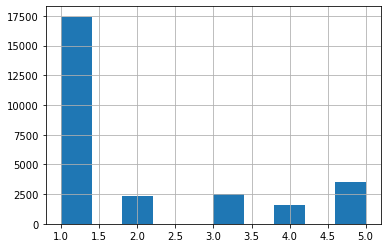

In [34]:
df.ratings.hist()

In [35]:
def rating_to_label(rating) :
  if rating >3:
    return 1
  else:
    return 0
df['y'] = df['ratings'].apply(lambda x : rating_to_label(x))

In [36]:
df

,date,comment,ratings,ko_text,nouns,y
0,2021-03-26,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,1,오류 굉장히 많고 개별구매 영화 개많아요 가뜩이나 비싼데 돈을 얼마나 더받으려고 넷...,"[오류, 개별, 구매, 영화, 가뜩이나, 얼마나, 넷플, 무료, 평판, 스스로, 웨이브]",0
1,2021-03-26,한번 더팅기면 회사 소각시켜도되나요?,1,한번 더팅기면 회사 소각시켜도되나요,"[한번, 회사, 각시]",0
2,2021-03-25,프리미엄13900원짜리 후기입니다. 일단 사지 마세요. 재미있는 영화는 거의다 막아...,1,프리미엄 원짜리 후기입니다 일단 사지 마세요 재미있는 영화는 거의다 막아서 프리미엄...,"[프리미엄, 후기, 일단, 사지, 영화, 거의, 프리미엄, 돈내, 거기, 채널, 정...",0
3,2021-03-25,오늘 앱이 죙일 안열리네요?자주 이러면 곤란한데 먼일이데요 ?? 언넝 조치를 취해주...,3,오늘 앱이 죙일 안열리네요 자주 이러면 곤란한데 먼일이데요 언넝 조치를 취해주셔요 ...,"[오늘, 죙일, 자주, 먼일, 언넝, 조치, 오늘, 영상]",0
4,2021-03-25,ㅡㄴㄴㄱㆍ 즈 ᆢㄱㄴ 그냥 ㄴㄴㆍㄴㆍ드ㅡㅡㅜ ㅣ두 ㆍ ㆍㄴ노트 ㄴㆍ ㆍ ㅡㅡ ㅡㅡ윤...,5,ㅡㄴㄴㄱ 즈 ㄱㄴ 그냥 ㄴㄴ ㄴ 드ㅡㅡㅜ ㅣ두 ㄴㄴㅗ트 ㄴ ㅡㅡ ㅡㅡ윤석원드ㅡ ㄴ ...,"[그냥, 윤석]",1
...,...,...,...,...,...,...
27387,2015-11-22,"암튼, 실시간 볼때도 계속 끊기거나 꺼지고.. 이걸 돈내고 써야하나 심각히 고민중입니다.",2,암튼 실시간 볼때도 계속 끊기거나 꺼지고 이걸 돈내고 써야하나 심각히 고민중입니다,"[실시간, 볼때, 계속, 고민]",0
27388,2015-11-22,이거 시간 돌리기 쓰면 화질엄청 깨지고 랙먹고;;;;;;차라리 전에것이 더 좋았어요...,1,이거 시간 돌리기 쓰면 화질엄청 깨지고 랙먹고 차라리 전에것이 더 좋았어요,"[시간, 화질, 랙먹, 차라리]",0
27389,2015-11-22,렉때문에 못참겠어요..... 다른서비스다좋고 티비광고하고 이벤트 좋은면 뭐해요 기존...,3,렉때문에 못참겠어요 다른서비스다좋고 티비광고하고 이벤트 좋은면 뭐해요 기존 사용자가...,"[때문, 서비스, 티비, 광고, 이벤트, 기존, 사용자, 오류, 때문, 네이버, 검...",0
27390,2015-11-22,실시간티비이건 다시보기이건 왜이렇게 렉걸리고 똑같은 와이파이 사용하는데 비디오포털 ...,1,실시간티비이건 다시보기이건 왜이렇게 렉걸리고 똑같은 와이파이 사용하는데 비디오포털 ...,"[실시간, 티비, 이건, 다시, 보기, 이건, 와이파이, 사용, 비디오, 포털, 티...",0


In [90]:
df.y.value_counts()

0    22272
1     5120
Name: y, dtype: int64

In [94]:
y= df['y']
X_train, X_test, y_train, y_test = train_test_split(tf_idf_vect, y, test_size = 0.2)

In [95]:
print(X_test.shape)

(5479, 8410)


# 로지스틱 회귀

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 86.79%


In [41]:
scores = cross_val_score(lr, tf_idf_vect, y, cv=10) # model, train, target, cross validation

print('cross-val-score \n{}'.format(scores))

print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.85839416 0.88430657 0.83278569 0.90069368 0.86966046 0.85761227
 0.8535962  0.84045272 0.86162833 0.85140562]
cross-val-score.mean 
0.861


In [42]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.88      0.97      0.92      4505
           1       0.76      0.37      0.50       974

    accuracy                           0.87      5479
   macro avg       0.82      0.67      0.71      5479
weighted avg       0.86      0.87      0.85      5479



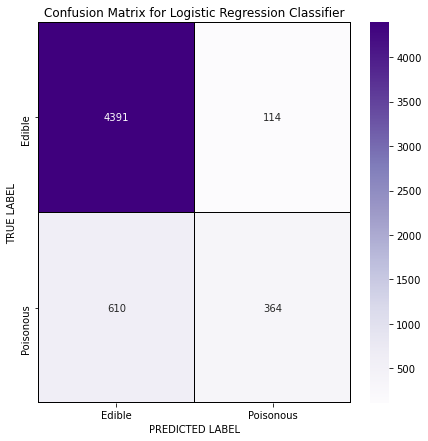

In [43]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 8410 artists>

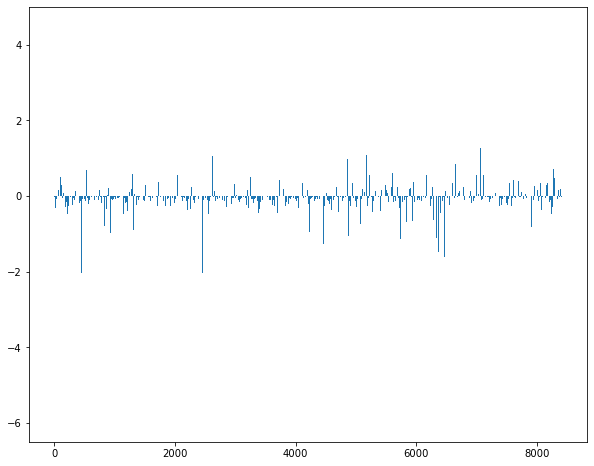

In [44]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [45]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)

In [46]:
for coef in coef_pos_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0]) #띄어쓰기 ,soynlp konlpy  한국어 

최고 4.480948306702756
유용 3.3085724604341813
굿굿 3.135696620537536
만족 3.0340334250960592
편리 3.0061675388960163
애용 2.847788787190288
쵝오 2.3340855617586462
감사 2.2287645066982043
화이팅 2.188520251172382
중드 2.1211696947741765
매우 2.0808453622752294
짱짱 2.05674172193517
강추 2.038242708169378
가장 2.0194580423282713
덕분 1.9373864026034837
기대 1.9062642890544474
볼거리 1.8887564221391846
항상 1.8342631856530378
디자인 1.8178563971658213
소년 1.8047666341185222
재미 1.7894476433521616
대박 1.784138586652934
이벤트 1.7830542867341015
보고 1.7769449956774357
호핀 1.751040231608079
사랑 1.7465686540176781
굿굿굿 1.717805481759216
예능 1.709364465664317
여러 1.6620120831947833
레벨 1.6602776925199696
한가지 1.6507535392200183
컨텐츠 1.6407866294510145
멘탈 1.6268743163477266
통해 1.6238834199552317
사용 1.6085833059371712
부담 1.5987858251004585
좀더 1.5788554014608909
캠프 1.5757346207669323
생방 1.5288677357476446
베리 1.5261100794282783
정말 1.5058170985869928
부분 1.5051947473847112
추천 1.4909531972658747
자취 1.4657986536031598
출퇴근 1.4495123967197496
기능 1.41875624

In [47]:
for coef in coef_neg_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0])

옥수 -5.977114942620951
최악 -4.916033527064851
쓰레기 -3.9720033966540966
짜증 -3.868843485428417
보상 -3.428214220892561
제대로 -3.01756073954078
도대체 -2.8142091007535104
환불 -2.7720831371232406
개도 -2.71873722265382
미리보기 -2.706125283148395
보라 -2.693618153509755
장난 -2.6314240130035818
탈퇴 -2.6056859408205995
해지 -2.418322293656282
자꾸 -2.4063369454398256
유료 -2.327219975275658
별로 -2.2947670585802147
이건 -2.283285349138845
실망 -2.2284034393961494
엉망 -2.226247195079319
혜택 -2.156764155812222
와이파이 -2.146584489889671
재생 -2.080374354900979
먹통 -2.0479215820194696
계속 -2.0216457760868627
이해 -2.015507590909209
어쩌 -1.9844372502339358
중지 -1.9719880006819521
개판 -1.9485947409721305
결재 -1.9335532143049734
심해 -1.9294769299803558
돈내 -1.921342037707539
접속 -1.9186701002802569
로딩 -1.8963472312614051
삭제 -1.8934039864908205
아예 -1.8571545515866843
고객 -1.8418865104463609
실행 -1.8124701251678774
정액 -1.7953506338491372
개별 -1.784315190018996
해도 -1.7761475597983083
구림 -1.7496198154964113
답답 -1.7463806808953963
관리 -1.7401518605587905
불

# 의사결정 트리

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4505
           1       0.54      0.40      0.46       974

    accuracy                           0.83      5479
   macro avg       0.71      0.66      0.68      5479
weighted avg       0.82      0.83      0.82      5479

Test Accuracy: 83.19%


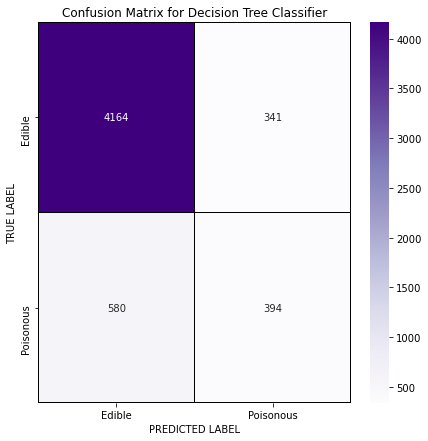

In [50]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 8410 artists>

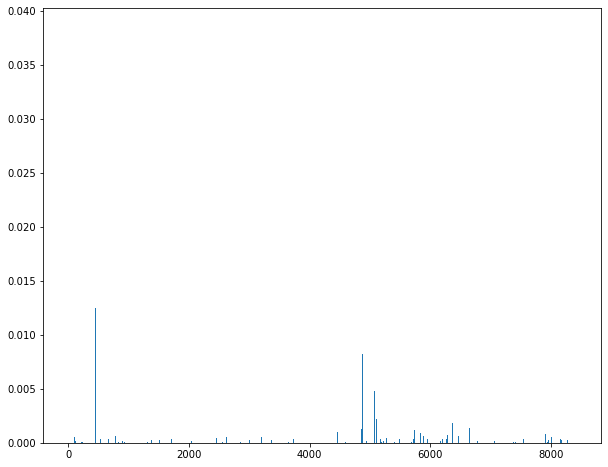

In [51]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)

In [52]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(dt.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(dt.feature_importances_)), reverse= False)

In [53]:
for coef in coef_pos_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0]) #띄어쓰기 ,soynlp konlpy  한국어 

최고 0.038357068659880374
옥수 0.025395269577806613
만족 0.024225763247615727
사용 0.018080267435960796
유용 0.014525986870661794
드라마 0.013790346717362264
재생 0.012534326736191028
계속 0.012475615980264981
정말 0.010412319794534079
보기 0.009700740005989037
방송 0.009542446699520934
무료 0.009305035106597708
불편 0.009112782606533538
보고 0.0086497275494927
웨이 0.008566805847535306
티비 0.008319597288742915
업데이트 0.008267809061530757
짜증 0.00812798101629044
이용 0.007667219333373281
편리 0.007565478779077563
프로 0.007531785489647635
기능 0.007361716604191395
다시 0.007281026371126104
컨텐츠 0.007094708022667876
굿굿 0.006875521823400185
로그인 0.006791312571900524
자꾸 0.006784023884231162
채널 0.006483543765208982
예능 0.006352856948564426
시청 0.006206810369010999
최악 0.006113013931120219
화질 0.00597072793545185
갑자기 0.005728413307044006
항상 0.00547986681333207
소년 0.005475844279787787
영상 0.004780617444614393
영화 0.004717153246624459
가격 0.00461976797705567
결제 0.004521750712095042
애용 0.004507625150241704
추천 0.00442991710065427
화면 0.004357889617

In [54]:
for coef in coef_neg_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0])

가게 0.0
가공 0.0
가구 0.0
가글 0.0
가급 0.0
가까이 0.0
가나다 0.0
가나다순 0.0
가납 0.0
가내 0.0
가눙 0.0
가는둥 0.0
가늠 0.0
가능성 0.0
가다가 0.0
가당 0.0
가독성 0.0
가득 0.0
가든 0.0
가라 0.0
가래 0.0
가량 0.0
가렵니 0.0
가루 0.0
가림 0.0
가망 0.0
가맹 0.0
가먄 0.0
가문 0.0
가믕 0.0
가방 0.0
가변 0.0
가상 0.0
가수 0.0
가연서 0.0
가요제 0.0
가용 0.0
가용성 0.0
가운데 0.0
가웃 0.0
가유 0.0
가을 0.0
가을동화 0.0
가이드 0.0
가입자 0.0
가장자리 0.0
가정교육 0.0
가정부 0.0
가중 0.0
가지가지 0.0


# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 2
Test Accuracy: 87.07%


In [56]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4505
           1       0.34      0.39      0.36       974

    accuracy                           0.76      5479
   macro avg       0.60      0.61      0.61      5479
weighted avg       0.77      0.76      0.76      5479



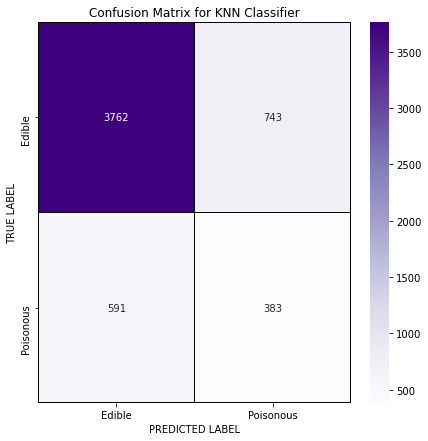

In [57]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 8410 artists>

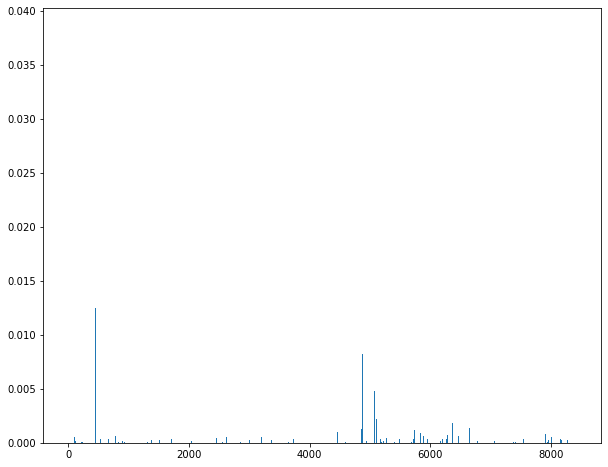

In [58]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)

In [59]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(dt.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(dt.feature_importances_)), reverse= False)

In [60]:
for coef in coef_pos_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0]) #띄어쓰기 ,soynlp konlpy  한국어 

최고 0.038357068659880374
옥수 0.025395269577806613
만족 0.024225763247615727
사용 0.018080267435960796
유용 0.014525986870661794
드라마 0.013790346717362264
재생 0.012534326736191028
계속 0.012475615980264981
정말 0.010412319794534079
보기 0.009700740005989037
방송 0.009542446699520934
무료 0.009305035106597708
불편 0.009112782606533538
보고 0.0086497275494927
웨이 0.008566805847535306
티비 0.008319597288742915
업데이트 0.008267809061530757
짜증 0.00812798101629044
이용 0.007667219333373281
편리 0.007565478779077563
프로 0.007531785489647635
기능 0.007361716604191395
다시 0.007281026371126104
컨텐츠 0.007094708022667876
굿굿 0.006875521823400185
로그인 0.006791312571900524
자꾸 0.006784023884231162
채널 0.006483543765208982
예능 0.006352856948564426
시청 0.006206810369010999
최악 0.006113013931120219
화질 0.00597072793545185
갑자기 0.005728413307044006
항상 0.00547986681333207
소년 0.005475844279787787
영상 0.004780617444614393
영화 0.004717153246624459
가격 0.00461976797705567
결제 0.004521750712095042
애용 0.004507625150241704
추천 0.00442991710065427
화면 0.004357889617

In [61]:
for coef in coef_neg_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0])

가게 0.0
가공 0.0
가구 0.0
가글 0.0
가급 0.0
가까이 0.0
가나다 0.0
가나다순 0.0
가납 0.0
가내 0.0
가눙 0.0
가는둥 0.0
가늠 0.0
가능성 0.0
가다가 0.0
가당 0.0
가독성 0.0
가득 0.0
가든 0.0
가라 0.0
가래 0.0
가량 0.0
가렵니 0.0
가루 0.0
가림 0.0
가망 0.0
가맹 0.0
가먄 0.0
가문 0.0
가믕 0.0
가방 0.0
가변 0.0
가상 0.0
가수 0.0
가연서 0.0
가요제 0.0
가용 0.0
가용성 0.0
가운데 0.0
가웃 0.0
가유 0.0
가을 0.0
가을동화 0.0
가이드 0.0
가입자 0.0
가장자리 0.0
가정교육 0.0
가정부 0.0
가중 0.0
가지가지 0.0


# SVM

In [62]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 82.22%


In [63]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.82      1.00      0.90      4505
           1       0.00      0.00      0.00       974

    accuracy                           0.82      5479
   macro avg       0.41      0.50      0.45      5479
weighted avg       0.68      0.82      0.74      5479



C:\ProgramData\Anaconda3\envs\Jae\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\Jae\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\Jae\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


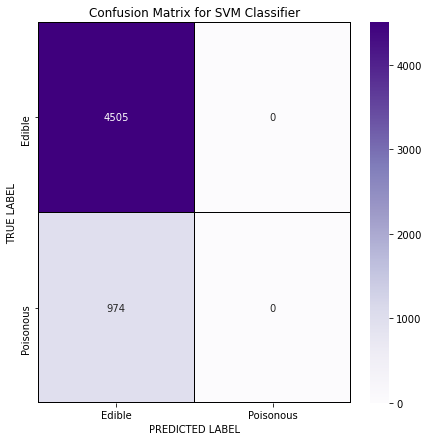

In [64]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 8410 artists>

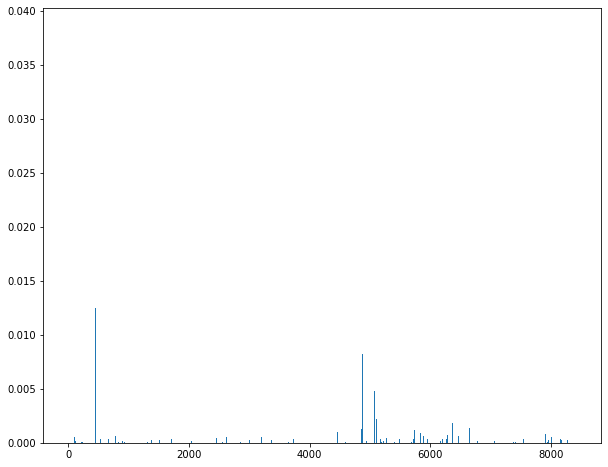

In [65]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)

In [66]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(dt.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(dt.feature_importances_)), reverse= False)

In [67]:
for coef in coef_pos_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0]) #띄어쓰기 ,soynlp konlpy  한국어 

최고 0.038357068659880374
옥수 0.025395269577806613
만족 0.024225763247615727
사용 0.018080267435960796
유용 0.014525986870661794
드라마 0.013790346717362264
재생 0.012534326736191028
계속 0.012475615980264981
정말 0.010412319794534079
보기 0.009700740005989037
방송 0.009542446699520934
무료 0.009305035106597708
불편 0.009112782606533538
보고 0.0086497275494927
웨이 0.008566805847535306
티비 0.008319597288742915
업데이트 0.008267809061530757
짜증 0.00812798101629044
이용 0.007667219333373281
편리 0.007565478779077563
프로 0.007531785489647635
기능 0.007361716604191395
다시 0.007281026371126104
컨텐츠 0.007094708022667876
굿굿 0.006875521823400185
로그인 0.006791312571900524
자꾸 0.006784023884231162
채널 0.006483543765208982
예능 0.006352856948564426
시청 0.006206810369010999
최악 0.006113013931120219
화질 0.00597072793545185
갑자기 0.005728413307044006
항상 0.00547986681333207
소년 0.005475844279787787
영상 0.004780617444614393
영화 0.004717153246624459
가격 0.00461976797705567
결제 0.004521750712095042
애용 0.004507625150241704
추천 0.00442991710065427
화면 0.004357889617

In [68]:
for coef in coef_neg_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0])

가게 0.0
가공 0.0
가구 0.0
가글 0.0
가급 0.0
가까이 0.0
가나다 0.0
가나다순 0.0
가납 0.0
가내 0.0
가눙 0.0
가는둥 0.0
가늠 0.0
가능성 0.0
가다가 0.0
가당 0.0
가독성 0.0
가득 0.0
가든 0.0
가라 0.0
가래 0.0
가량 0.0
가렵니 0.0
가루 0.0
가림 0.0
가망 0.0
가맹 0.0
가먄 0.0
가문 0.0
가믕 0.0
가방 0.0
가변 0.0
가상 0.0
가수 0.0
가연서 0.0
가요제 0.0
가용 0.0
가용성 0.0
가운데 0.0
가웃 0.0
가유 0.0
가을 0.0
가을동화 0.0
가이드 0.0
가입자 0.0
가장자리 0.0
가정교육 0.0
가정부 0.0
가중 0.0
가지가지 0.0


# 랜덤 포레스트

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 85.98%


In [70]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.87      0.97      0.92      4505
           1       0.71      0.36      0.48       974

    accuracy                           0.86      5479
   macro avg       0.79      0.66      0.70      5479
weighted avg       0.85      0.86      0.84      5479



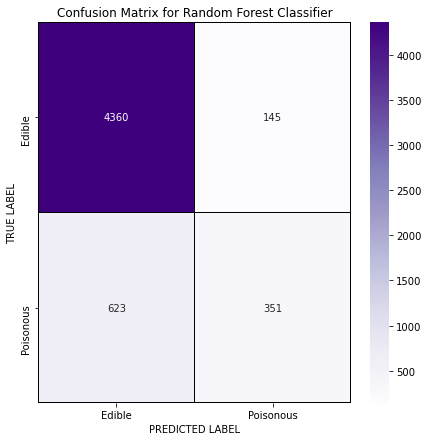

In [71]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 8410 artists>

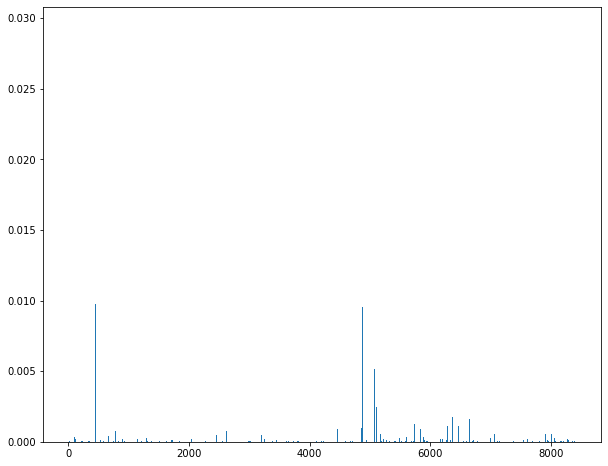

In [72]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)

In [73]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(rf.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(rf.feature_importances_)), reverse= False)

In [74]:
for coef in coef_pos_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0]) #띄어쓰기 ,soynlp konlpy  한국어 

최고 0.029324895145847303
옥수 0.024079058323726695
사용 0.015262799616526369
만족 0.012890657556735598
드라마 0.011666921774475895
보기 0.01049850778907676
계속 0.00978170160541737
정말 0.009648317271290181
보고 0.00962058765063057
업데이트 0.009512289306326084
이용 0.00938238073819933
방송 0.00870782289601356
다시 0.008587383617307938
웨이 0.008512688470888565
유용 0.008436661661951138
예능 0.0080591478505187
재생 0.008037272172815073
무료 0.0072043472185717525
컨텐츠 0.007163492073970156
갑자기 0.007044254068790814
자꾸 0.0068605904072535796
화질 0.006777960032560982
프로 0.006640904083551739
편리 0.006529044913033524
채널 0.006510553046069789
짜증 0.006491071844089213
오류 0.006428892430356343
불편 0.006362214338437457
티비 0.006287221035233235
로그인 0.006186577052850253
굿굿 0.005849399429002395
항상 0.005568986427417166
최악 0.005415996325033775
진짜 0.005326373872099637
결제 0.005315937983500612
영상 0.005157594405275074
영화 0.005116261902298813
기능 0.004959110419281419
화면 0.004823554164325844
시청 0.004653321862028419
매우 0.004608406969575981
추천 0.0043563317

In [75]:
for coef in coef_neg_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0])

가공 0.0
가글 0.0
가능성 0.0
가래 0.0
가맹 0.0
가용 0.0
가장자리 0.0
가트 0.0
가해 0.0
각성 0.0
각심 0.0
간단명료 0.0
간도 0.0
간정 0.0
간첩 0.0
감각 0.0
감겨 0.0
감독 0.0
감빵 0.0
감안 0.0
갑작스레 0.0
값좀 0.0
갔드 0.0
강재 0.0
강조 0.0
강추임 0.0
강형욱 0.0
개강 0.0
개개인 0.0
개과천선 0.0
개꿀잼 0.0
개보 0.0
개삽 0.0
개섬 0.0
개쉬발것 0.0
개쓰뤠기임 0.0
개임 0.0
개잡 0.0
개장 0.0
개좋름 0.0
개좍 0.0
개쪽 0.0
개차반 0.0
개폭망 0.0
갤놋 0.0
갸시러 0.0
걀제 0.0
거미 0.0
거스 0.0
거액 0.0


# 라쏘

In [80]:
import mglearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [93]:
lasso = Lasso().fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.00
테스트 세트의 정확도 : -0.00
사용한 특성의 수 : 0
사용한 max_iter : 1


In [96]:
#성능 측정

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))


lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso001.n_iter_))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso00001.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso00001.n_iter_))

훈련 세트의 정확도 : 0.00
테스트 세트의 정확도 : -0.00
사용한 특성의 수 : 0
사용한 max_iter : 1
훈련 세트의 정확도 : 0.00
테스트 세트의 정확도 : -0.00
사용한 특성의 수 : 0
사용한 max_iter : 1
훈련 세트의 정확도 : 0.29
테스트 세트의 정확도 : 0.29
사용한 특성의 수 : 290
사용한 max_iter : 73


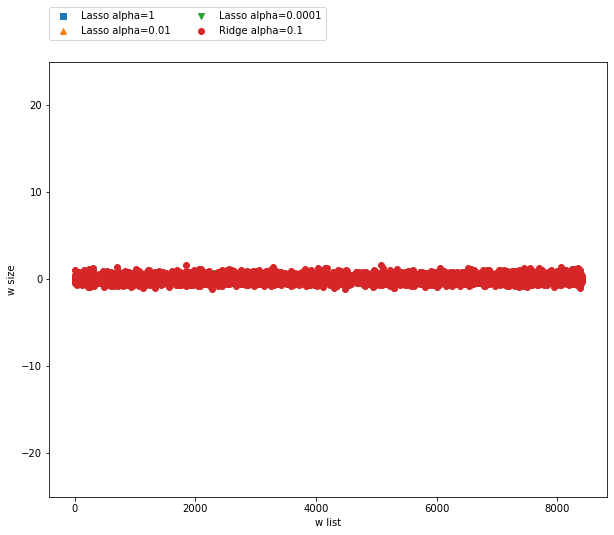

In [97]:
#alpha값에 따른 모델들의 계수 그래프 그리기

# 릿지 회귀
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# 라쏘 회귀
lasso = Lasso().fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)



plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("w list")
plt.ylabel("w size")

# plt.hlines(0, 0, len(lr.coef_))

plt.ylim(-25, 25)
plt.show()

In [100]:
lasso=Lasso() # LASSO 모형 설정
lasso.fit(X_train, y_train)
#%%
np.sum(lasso.coef_ !=0)

from sklearn.linear_model import LassoCV
lassocv = LassoCV() #Cross Validation을 통해서 lambda값을 설정한다
lassocv.fit(X_train, y_train)
#%%
 
lassocv.alpha_ #Cross Validation을 통해 추출한 lambda값
#%%
lassocv.coef_[:5]
np.sum(lassocv.coef_ !=0)
'''
실제 위에서 추출된 람다값은 0.64정도이며 이에 따라 독립변수의 계수가 0이 될 확률은
더욱 높아졌다. 위의 np.sum의 값은 34개이며, 이는 독립변수의 계수가 0인 아닌것은 것은 총 34개라는
의미
'''
 
#%%
 
mask = lassocv.coef_ != 0
new_reg_data = X_train[:, mask]
new_reg_data.shape

(21913, 982)

In [101]:
X, y = mglearn.datasets.load_extended_boston() # 보스턴 주택가격 데이터셋 불러오기

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 데이터셋을 훈련셋과 테스트셋으로 분리

lasso = Lasso().fit(X_train, y_train) # 라쏘 회귀 모델 훈련

print("training set score: {:.2f}".format(lasso.score(X_train, y_train))) # 훈련셋 결정계수
print("test set score: {:.2f}".format(lasso.score(X_test, y_test))) # 테스트셋 결정계수
print("the number of the used features: {}".format(np.sum(lasso.coef_ != 0))) # 사용된 특성갯수

usedfeatures = np.nonzero(lasso.coef_ != 0)
print("numbers of the used features: ", usedfeatures[0])# 사용된 특성 번호

training set score: 0.29
test set score: 0.21
the number of the used features: 4
numbers of the used features:  [12 79 80 89]


In [103]:
lasso = Lasso(alpha=0.01).fit(X_train, y_train) # 라쏘 회귀 모델 훈련

print("training set score: {:.2f}".format(lasso.score(X_train, y_train))) # 훈련셋 결정계수
print("test set score: {:.2f}".format(lasso.score(X_test, y_test))) # 테스트셋 결정계수
print("the number of the used features: {}".format(np.sum(lasso.coef_ != 0))) # 사용된 특성갯수

usedfeatures = np.nonzero(lasso.coef_ != 0)
print("numbers of the used features: ", usedfeatures[0])# 사용된 특성 번호

training set score: 0.90
test set score: 0.77
the number of the used features: 32
numbers of the used features:  [  7   8  21  26  43  45  50  51  52  54  57  59  60  63  65  68  69  71
  72  73  74  75  78  82  87  90  93  94  97 101 102 103]


C:\ProgramData\Anaconda3\envs\Jae\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003173706, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(
